# Group

Christine Pham, Hayden Bustos, Rachel Le,
John Aguinaga, Bavithra Lakshmanasamy


## Modeling with Multiple Linear Regression and XGBoost

- We pick up from where our preprocessing was done.   
<br></br>
- The dataset has already been cleaned and ready for further analysis. This includes: cleaning missing values, dropping irrelevant values and feature engineering.

In [ ]:
#!pip install statsmodels

In [ ]:
# we import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import boxcox
from scipy import stats

In [ ]:
# lets see our files in our current working directory

!ls -l

total 326148
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga    889053 Apr 15 17:29  CalCOFI.ipynb
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga    477788 Apr 26 17:51 'CalCOFI_CPham (1) (1).ipynb'
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga   1055137 Apr 26 17:52  CalCOFI_RLportion.ipynb
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga     30392 Apr 14 20:28  DATA-3442_semester_project.ipynb
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga   2145968 Apr 14 22:12 'Introduction_to_Geostatistics (1).ipynb'
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga     26137 Apr 17 14:22  Notes.docx
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga 257414189 Feb 20 21:03  bottle.csv
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga  12065734 Feb 20 21:03  cast.csv
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga     36153 Apr 28 12:08  correlation_matrix.jpg
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga  20347523 Apr 26 17:58  feature_engineer_df.csv
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga    347969 Apr 28 12:57  lin_reg_modeling.ipynb
-rwxrwxrwx 1 johnbaguinaga joh

In [ ]:
# importing the preprocessed csv file

df = pd.read_csv("pre_outliers_df.csv")

<br></br>
### Preprocessing dataset for use in linear regression:
- Rationale is multiple linear regression is *much* easier to interpret and run statistical tests between variable relationships if all values are numerical and continous.
<br></br>
- We use the *feature_engineer.csv* file **before** we created the latitude and longitude blocks.

In [ ]:
# pip install gsw

In [ ]:
# pip install shapely

In [ ]:
# pip install geopandas

In [ ]:
# libraries used to preprocess

import numpy as np
import pandas as pd
import gsw
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
# latitude
df["lat_block"] = 0

for index, row in df.iterrows():
    if row["Lat_Dec"] < 20:
        df.at[index, "lat_block"] = 1
    elif 20 <= row["Lat_Dec"] < 25:
        df.at[index, "lat_block"] = 2
    elif 25 <= row["Lat_Dec"] < 30:
        df.at[index, "lat_block"] = 3
    elif 30 <= row["Lat_Dec"] < 35:
        df.at[index, "lat_block"] = 4
    elif 35 <= row["Lat_Dec"] < 40:
        df.at[index, "lat_block"] = 5
    elif 40 <= row["Lat_Dec"] < 45:
        df.at[index, "lat_block"] = 6
    elif row["Lat_Dec"] >= 45:
        df.at[index, "lat_block"] = 7

# longitude
df["lon_block"] = 0

for index, row in df.iterrows():
    if row["Lon_Dec"] < -160:
        df.at[index, "lon_block"] = 1
    elif -160 <= row["Lon_Dec"] < -155:
        df.at[index, "lon_block"] = 2
    elif -155 <= row["Lon_Dec"] < -150:
        df.at[index, "lon_block"] = 3
    elif -150 <= row["Lon_Dec"] < -145:
        df.at[index, "lon_block"] = 4
    elif -145 <= row["Lon_Dec"] < -140:
        df.at[index, "lon_block"] = 5
    elif -140 <= row["Lon_Dec"] < -135:
        df.at[index, "lon_block"] = 6
    elif -135 <= row["Lon_Dec"] < -130:
        df.at[index, "lon_block"] = 7
    elif -130 <= row["Lon_Dec"] < -125:
        df.at[index, "lon_block"] = 8
    elif -125 <= row["Lon_Dec"] < -120:
        df.at[index, "lon_block"] = 9
    elif -120 <= row["Lon_Dec"] < -115:
        df.at[index, "lon_block"] = 10
    elif -115 <= row["Lon_Dec"] < -110:
        df.at[index, "lon_block"] = 11
    elif row["Lon_Dec"] >= -110:
        df.at[index, "lon_block"] = 12

In [ ]:
# calculate frequency and the depth of occurance

frequency_N2, new_depthm = gsw.stability.Nsquared(SA=df["Salnty"],
                                                   CT=df["T_degC"],
                                                   p=df["Depthm"])

frequency_N2 = np.append(frequency_N2, np.nan) # makes array and df the same length
new_depthm = np.append(new_depthm, np.nan) # makes array and df the same length

df["frequency_N2"]=frequency_N2
df["new_depthm"]=new_depthm

/home/johnbaguinaga/.local/lib/python3.7/site-packages/gsw/stability.py:85: RuntimeWarning: divide by zero encountered in true_divide
  N2 = ((g_local**2) / (specvol_mid * db_to_pa * dp))
/home/johnbaguinaga/.local/lib/python3.7/site-packages/gsw/stability.py:86: RuntimeWarning: invalid value encountered in multiply
  N2 *= (beta_mid*dSA - alpha_mid*dCT)


In [ ]:
# getting rid of frequency_N2 and p_mid_dbar values when the location changes

prev_depth = None
for i in range(len(df)):
    curr_depth = df.at[i, 'Depthm']
    if prev_depth is not None and curr_depth <= prev_depth:
        df['frequency_N2'].iloc[i-1] = np.nan
        df['new_depthm'].iloc[i-1] = np.nan
        prev_depth = None
    prev_depth = curr_depth

/home/johnbaguinaga/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_trans = df.drop(columns=["Cst_Cnt", "Depthm", "T_degC", "Salnty", "STheta", "Lat_Dec", "Lon_Dec"])
df = df.drop(columns=["Cst_Cnt", "Depthm", "T_degC", "Salnty", "STheta", "lat_block", "lon_block"])

In [ ]:
df.shape

(812174, 4)

In [ ]:
df_trans.shape

(812174, 4)

In [ ]:
df.head()

,Lat_Dec,Lon_Dec,frequency_N2,new_depthm
0,38.833333,-124.083333,0.000008,4.0
1,38.833333,-124.083333,-0.000011,9.0
2,38.833333,-124.083333,-0.000012,14.5
3,38.833333,-124.083333,0.000007,19.5
4,38.833333,-124.083333,0.000007,25.0


In [ ]:
df_trans.head()

,lat_block,lon_block,frequency_N2,new_depthm
0,5,9,0.000008,4.0
1,5,9,-0.000011,9.0
2,5,9,-0.000012,14.5
3,5,9,0.000007,19.5
4,5,9,0.000007,25.0


<br></br>
<br></br>
<br></br>
- We have **5** features as part of the data for our model. Let's look at our correlation matrix from earlier to see the relationships between all of our variables.

In [ ]:
columns = df.select_dtypes(include='number').columns

In [ ]:
# making our correlation matrix

corr_mat = df.corr()

In [ ]:
# setting up a p-value matrix

p_value_matrix = pd.DataFrame(data=np.zeros(shape=(len(columns), len(columns))),columns=columns, index=columns)

<br></br>
- We have some missing in the values in the dataset. It may be beneficial to drop them so they don't impede further along in our analysis.
<br></br>

In [ ]:
# displaying missing values. We can elect to drop them since they are such a small size of our overall dataset

missing_values = df.isnull().sum()
missing_values

Lat_Dec             0
Lon_Dec             0
frequency_N2    34226
new_depthm      34226
dtype: int64

In [ ]:
# rows and columns before removing missing values

df.shape

(812174, 4)

In [ ]:
# rows and columns after removing missing values

df = df.dropna()
df.shape

(777948, 4)

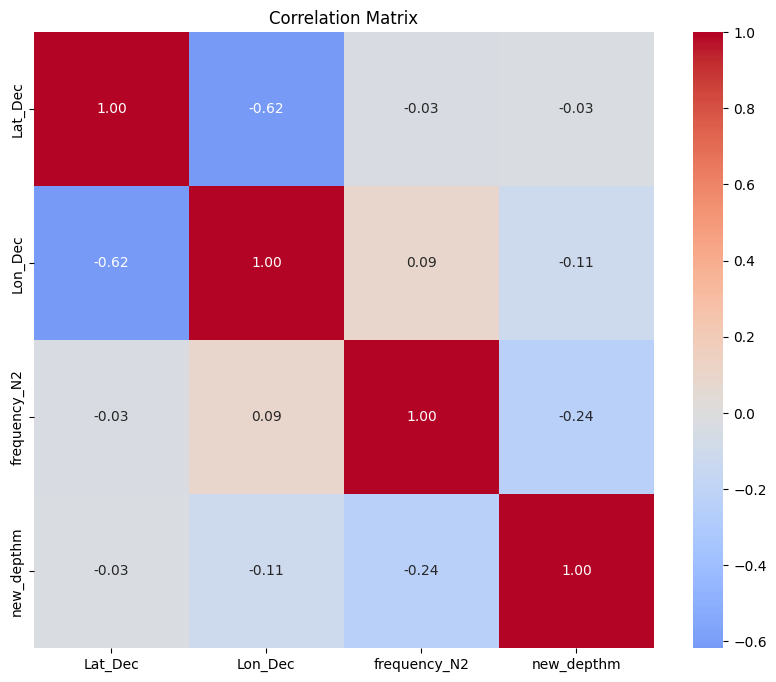

In [ ]:
# making it match the output from earlier

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
# plt.savefig("correlation_matrix.jpg")  # Save the figure as a JPEG file
# plt.close()
plt.show()

<br></br>
- We do not seem to have any redundancy from looking at our scatterplot. This will help with making sure we don't have multicollinearity when we build our model.

- There are some assumptions that need to be met before we incorporate multiple linear regression:  
<br></br>
    **1. Linear Relationship** (between independent and dependent variables):
        - We need to check this because a non-linear relationship will be harder to be captured by our model, which could result in bias in our predictions/estimates.
    <br></br>
    **2. Independence** (of Observations):
        - It is assumed that the observations are not influenced by each other. Violating this assumption leads to autocorrelation, which can inflate the significance of findings because the standard errors of the estimates become biased.  
    <br></br>
    **3. Normality** (of Residuals):
        - This assumption states that the model's residuals (not the variables themselves) should be normally distributed. If this is not the case, it could affect the validity of the hypothesis tests and confidence intervals. If the residuals are not normally distributed, standard errors and therefore test statistics may be inaccurate, which can lead to incorrect conclusions in hypothesis testing.
    <br></br>
    **4. Equality of Variance** (*Homoscedasticity*): This assumes that the spread or scatter of the response (dependent variable) around the predicted values (regression line) is constant across all levels of the independent variables.
        <br></br>
    **5. Multicolinearity** (is absent):
        - It is assumed that the observations are not influenced by each other. Violating this assumption leads to autocorrelation, which can inflate the significance of findings because the standard errors of the estimates become biased.
    

<br></br>
 - We assume that **2** is true based off how the sample data was collected. This leaves us with having to validate assumptions **1**, **3**, **4** and **5.**
 <br></br>
 - Let's check for **Linear relationships (1)** first.
 <br></br>

#### Independent variables vs Depedent variable (checking normality) :
<br></br>

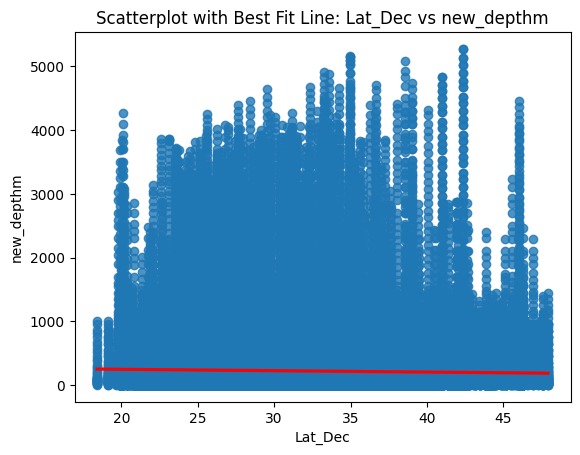

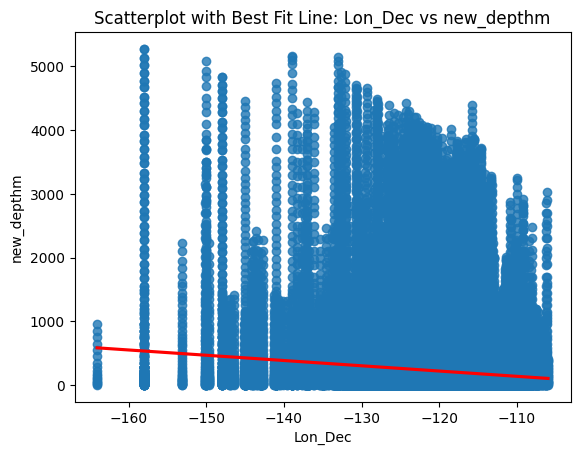

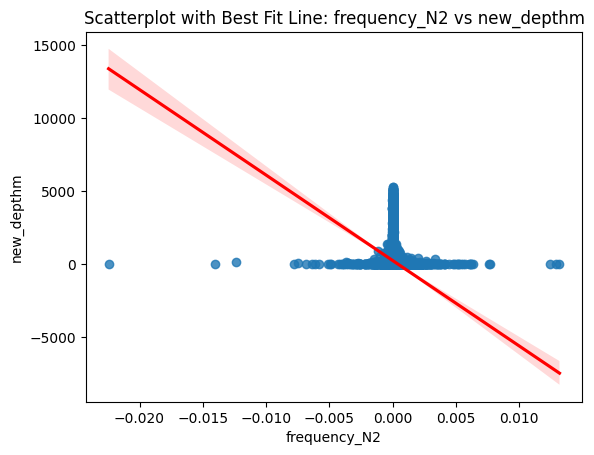

In [ ]:
# plotting independent variables against dependent variable

for col in df.select_dtypes(include="number"):
    if col == "new_depthm":
        continue
    # Create a scatterplot with a best fit line
    sns.regplot(x=col, y="new_depthm", data=df, line_kws={"color": "red"})
    # Set the title for the plot
    plt.title(f"Scatterplot with Best Fit Line: {col} vs new_depthm")
    # Display the plot
    plt.show()

In [ ]:
# Replace 'your_dataframe' with your actual DataFrame variable name
# Replace 'target_column_name' with the name of your target column
def calculate_correlations(df, target_column_name):
    correlation_results = []

    for explanatory_variable in df.columns.drop(target_column_name):
        correlation_coef, p_value = stats.pearsonr(df[explanatory_variable], df[target_column_name])
        correlation_results.append({
            'Explanatory Variable': explanatory_variable,
            'Correlation Coefficient': correlation_coef,
            'p-value': p_value
        })

    return pd.DataFrame(correlation_results)

In [ ]:
df_correlations = calculate_correlations(df, 'new_depthm')
df_correlations

,Explanatory Variable,Correlation Coefficient,p-value
0,Lat_Dec,-0.026534,3.602983e-121
1,Lon_Dec,-0.111768,0.000000e+00
2,frequency_N2,-0.239818,0.000000e+00


<br></br>

- From our plots, we can see that **none** of our variables exhibit a *non-linear relationship*. So our first assumption is not violated.
<br></br>
- Next, we want to make sure there is **no multicollinearity** from our independent variables. Our scatterplot showed none of the variables seemed significantly correlated. However, from our knowledge, latitude and longtitude are usually correlated and especially so when our data is from the primarily from the same geographic area.
<br></br>
- We can use the variance inflation factor (VIF) to get a measure of multicolinearity. First let plot our against one another.

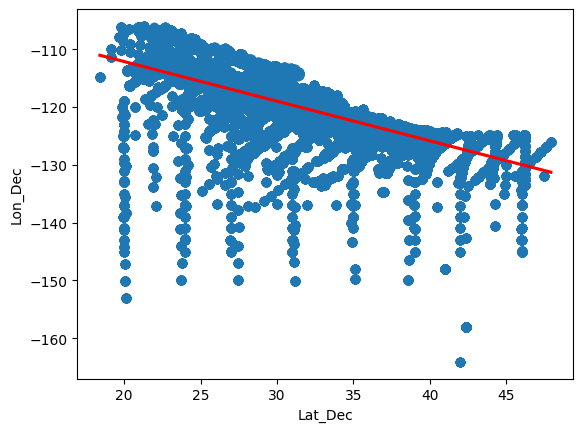

In [ ]:
# plotting latitude vs. longtitude

sns.regplot(x=df["Lat_Dec"], y=df["Lon_Dec"], line_kws={"color": "red"})
plt.show()

<br></br>
- There seems to be a somewhat significant linear relationship between the variables. We want to make sure there is no multicolinearity, so we need to calculate the **Variance Inflation Factor (VIF)** to get a *quantitative measure* of whether or not we can rule this problem out.
<br></br>

In [ ]:
# importing necessary libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df_with_const = add_constant(df)

# initializing a DataFrame to store VIF scores
vif_df = pd.DataFrame()
vif_df["feature"] = df_with_const.columns  # Ensure you reference the DataFrame with the constant

# calculating VIF for each column in the DataFrame that includes the constant
vif_df["VIF value"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

In [ ]:
# display our VIF scores. We exclude the first variable since it is the constant and we exclude the target

vif_df[1:4]

,feature,VIF value
1,Lat_Dec,1.639656
2,Lon_Dec,1.663075
3,frequency_N2,1.065134


<br></br>

<br></br>
### Running Simple Linear Regression (Explanatory variable = *frequency_N2*):
<br></br>

In [ ]:
# importing visualization library

from IPython.display import display, HTML

In [ ]:
# dropping some features for our analysis

df_freq= df.drop(columns=['Lon_Dec', 'Lat_Dec'], inplace=False)

In [ ]:
df_freq.head()

,frequency_N2,new_depthm
0,0.000008,4.0
1,-0.000011,9.0
2,-0.000012,14.5
3,0.000007,19.5
4,0.000007,25.0


In [ ]:
formula = 'new_depthm ~ frequency_N2'
model = smf.ols(formula, data=df_freq).fit()

In [ ]:
import statsmodels.formula.api as smf

# displaying the regression summary
summary = model.summary().as_html()  # Converts the summary to HTML
display(HTML(summary))

<br></br>
<br></br>
### Running Simple Linear Regression (*All explanatory variables*):
<br></br>

In [ ]:
# dropping some features for our analysis

df_all = df

In [ ]:
df_all.head()

,Lat_Dec,Lon_Dec,frequency_N2,new_depthm
0,38.833333,-124.083333,0.000008,4.0
1,38.833333,-124.083333,-0.000011,9.0
2,38.833333,-124.083333,-0.000012,14.5
3,38.833333,-124.083333,0.000007,19.5
4,38.833333,-124.083333,0.000007,25.0


In [ ]:
formula = 'new_depthm ~ Lat_Dec + Lon_Dec + frequency_N2'
model = smf.ols(formula, data=df_all).fit()

In [ ]:
# displaying the regression summary
summary = model.summary().as_html()  # Converts the summary to HTML
display(HTML(summary))

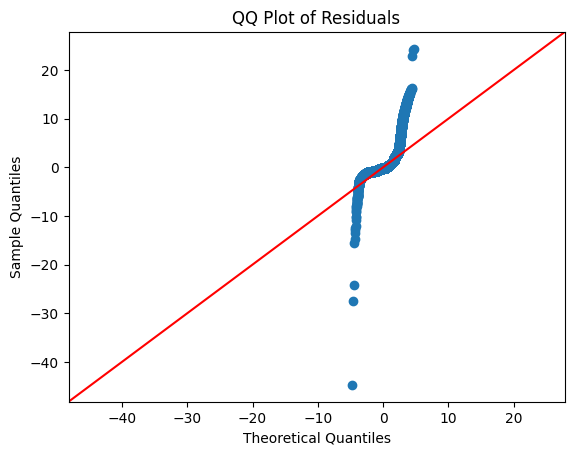

In [ ]:
residuals = model.resid  # Extract residuals
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

<br></br>
<BR></br>

### Creating a residual plot to check for E.o.V.
<br></br>

<br></br>

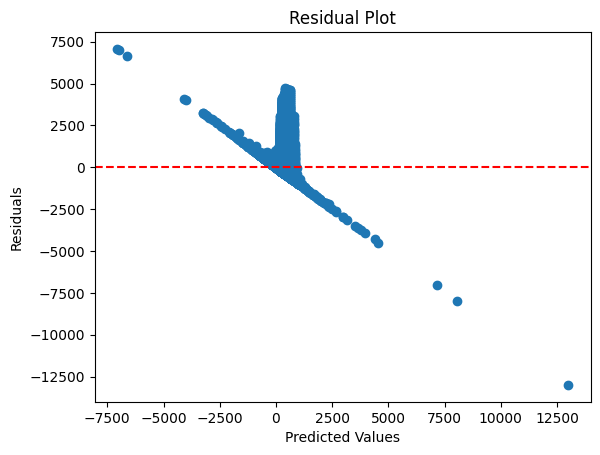

In [ ]:
X = sm.add_constant(X)  # adding a constant if you haven't already
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
residuals = model.resid

# Creating the residual plot
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')  # Adds a horizontal line at zero
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### One-hot encoding features
<br></br>

In [ ]:
# looking at the size of our dataframe

df_trans.shape

(812174, 4)

In [ ]:
# dropping our missing values first

df_trans = df_trans.dropna()
df_trans.shape

(777948, 4)

In [ ]:
# we need to check our different values for the categorical variables

print(df_trans['lat_block'].unique())

[5 4 3 2 6 7 1]


In [ ]:
print(df_trans['lon_block'].unique())

[ 9  8  7 10 11  6 12  5  4  3  2  1]


In [ ]:
# one-hot encoding latitude block

one_hot = pd.get_dummies(df_trans['lat_block'], prefix='lat_block')
df_trans = df_trans.drop('lat_block', axis=1)
df_trans = df_trans.join(one_hot)

In [ ]:
# one-hot encoding longitude block

one_hot = pd.get_dummies(df_trans['lon_block'], prefix='lon_block')
df_trans = df_trans.drop('lon_block', axis=1)
df_trans = df_trans.join(one_hot)

In [ ]:
df_trans.head()

,frequency_N2,new_depthm,lat_block_1,lat_block_2,lat_block_3,lat_block_4,lat_block_5,lat_block_6,lat_block_7,lon_block_1,...,lon_block_3,lon_block_4,lon_block_5,lon_block_6,lon_block_7,lon_block_8,lon_block_9,lon_block_10,lon_block_11,lon_block_12
0,0.000008,4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.000011,9.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.000012,14.5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.000007,19.5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.000007,25.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<br></br>
<br></br>
<br></br>
### Removing outliers
<br></br>

In [ ]:
column_name = 'Lat_Dec'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
column_name = 'Lon_Dec'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
column_name = 'frequency_N2'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
column_name = 'new_depthm'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
# removing the outliers from the transformed df

cols = ['frequency_N2', 'new_depthm']
for column_name in cols:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the DataFrame to remove outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

<br></br>
### Full regression model (with transformed variables)
<br></br>

In [ ]:
# model Selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linear_reg = LinearRegression()

In [ ]:
# we remove the target column, so we only have the explanatory features as "X"
X = df.drop('new_depthm', axis=1)

# isolating the target variable
y = df['new_depthm']

In [ ]:
# split the data into training and testing sets (we use a 80/20 train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(527500, 3)
(131875, 3)
(527500,)
(131875,)


In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# predictions on the testing set
y_pred_linear = linear_reg.predict(X_test)

# evaluating Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Linear Regression': [linear_mse, linear_mae, linear_r2]
})

print(metrics_df)

                      Metric  Linear Regression
0   Mean Squared Error (MSE)       82776.760907
1  Mean Absolute Error (MAE)         168.704330
2             R-squared (R2)           0.095232


In [ ]:
# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_linear)
print("Explained Variance Score:", explained_variance)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred_linear):
    return np.mean(np.abs((y_true - y_pred_linear) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_linear)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Adjusted R-squared
def adjusted_r_squared(y_true, y_pred_linear, n, p):
    r_squared = r2_score(y_true, y_pred_linear)
    adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    return adj_r_squared

adjusted_r2 = adjusted_r_squared(y_test, y_pred_linear, len(y_test), X_test.shape[1])
print("Adjusted R-squared:", adjusted_r2)

Explained Variance Score: 0.13243510853020635
Mean Absolute Percentage Error (MAPE): 1360.303387131399
Adjusted R-squared: 0.13241220646091156


<br></br>
- **Residual Plot**
<br></br>

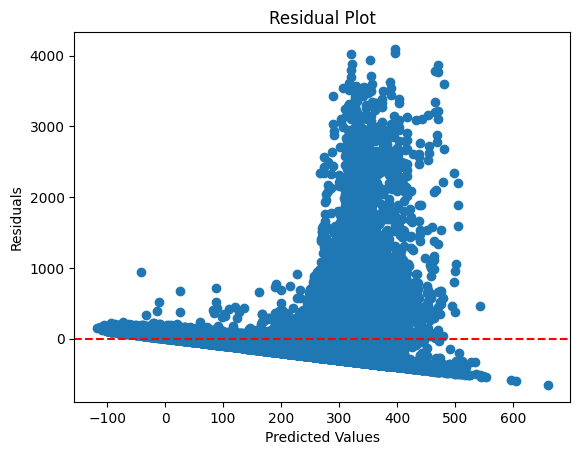

In [ ]:
residuals = y_test - y_pred_linear

plt.scatter(y_pred_linear, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<br></br>

 ## Using XGBoost
 <br></br>

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.7 MB/s eta 0:00:0000:0100:02
DEPRECATION: distro-info 0.18ubuntu0.18.04.1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
# Model Training
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [219.67674915 222.01845162 220.50018178 215.5176471  223.34566065]
Mean RMSE: 220.21173805992106


In [ ]:
# Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   6.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   6.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  16.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.3s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   5.1s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   6.8s
[CV] END ...learning_rate=0.01, max_depth=4, n_e

In [ ]:
# Model Evaluation
y_pred = xgb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on the testing set:", mae)
print("Mean Squared Error (MSE) on the testing set:", mse)

Mean Absolute Error (MAE) on the testing set: 105.82418306802629
Mean Squared Error (MSE) on the testing set: 47444.05561686244


In [ ]:
# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Adjusted R-squared
def adjusted_r_squared(y_true, y_pred, n, p):
    r_squared = r2_score(y_true, y_pred)
    adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    return adj_r_squared

adjusted_r2 = adjusted_r_squared(y_test, y_pred, len(y_test), X_test.shape[1])
print("Adjusted R-squared:", adjusted_r2)

Explained Variance Score: 0.48142741847679915
Mean Absolute Percentage Error (MAPE): 593.5650389448806
Adjusted R-squared: 0.481359384443485
